In [15]:
import pandas as pd


df = pd.read_excel('Query_11.xlsx')

In [16]:
df=df.head(400)

In [17]:
df.head()

b1           b2          b3           b4           b5  \
0  1119.173462  2241.181641  573.418701   914.979065  3128.707764   
1   579.056091  3585.113037  314.819855   708.317017  3534.294189   
2  1034.131714  3708.768555  542.762329  1031.504272  4131.856445   
3   926.238098  3318.897217  486.446289   924.007141  3715.292236   
4   988.537048  2786.892578  570.810364   928.292786  3230.314209   

            b6           b7       tmin       tmax      prcp  \
0  3247.370361  2215.685791   2.659751  11.115650  3.476146   
1  2493.193359  1221.297485  16.896063  29.698597  5.147169   
2  3553.105469  2450.981445  15.156509  28.380976  0.000000   
3  3262.375488  2188.172119  14.386539  25.148739  5.875622   
4  2927.056152  2054.672607  11.171411  21.794228  2.820405   

   heat_cold_wave_indx  drought_indx      NDVI       EVI      NDWI  year_obs  \
0                 0.00           1.0  0.329689  0.565295 -0.169698      2003   
1                 0.00           1.0  0.716725  1.506106  0.003644      2003   
2                 0.00           1.0  0.563903  1.096366 -0.055305      2003   
3                 0.00           0.0  0.562693  1.090795 -0.057005      2003   
4                 0.05           0.0  0.480286  0.899202 -0.078630      2003   

   State_ANSI  County_ANSI  yield_Value  
0          17            1          171  
1          17            1          171  
2          17            1          171  
3          17            1          171  
4          17            1          171

In [18]:
import numpy as np

labels = np.array(df['yield_Value'])

features= df.drop(['year_obs',  'State_ANSI', 'County_ANSI', 'yield_Value'], axis = 1)# Remove the Crop Yield from the features

feature_list = list(features.columns)# Saving feature names for later use

features = np.array(features)# Convert features to numpy array

In [19]:
np.unique(labels)

array([131, 145, 147, 152, 168, 171, 173, 175, 183], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)# Split the data into 70% training and 30% testing sets


In [21]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
#X_train,X_test,Y_train,Y_test = train_features, test_features, train_labels, test_labels
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(train_features, train_labels)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, train_features, link="logit")
shap_values = explainer.shap_values(test_features, nsamples=100)



The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
Using 280 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [26]:
# plot the SHAP values for the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], pd.DataFrame(train_features).iloc[0,:], link="logit")

In [10]:
type(X_train)

pandas.core.frame.DataFrame

In [22]:
explainer

In [37]:
np.max(shap_values)

0.026293889561469858

In [36]:
np.min(shap_values)

-0.020401736308152764

In [31]:
shap_values[0][0].shape

(15,)

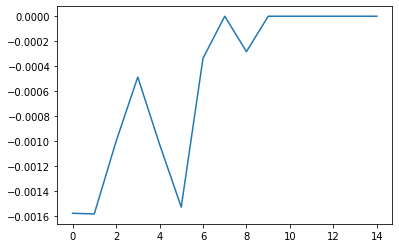

In [34]:
import matplotlib.pyplot as plt

plt.plot(shap_values[0][10])
plt.show()

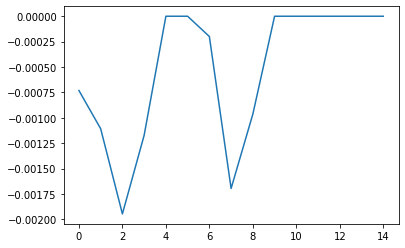

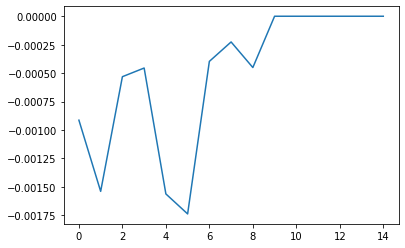

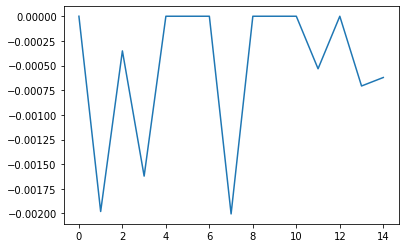

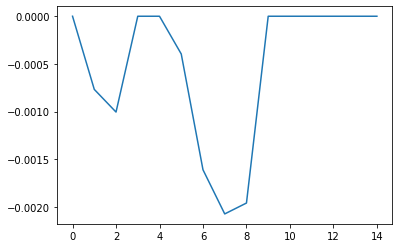

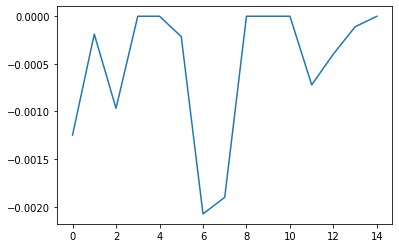

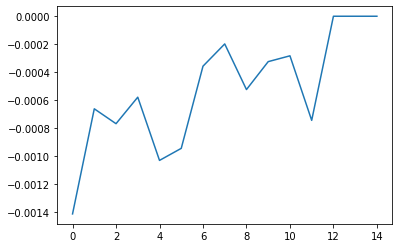

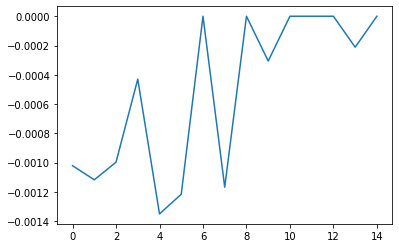

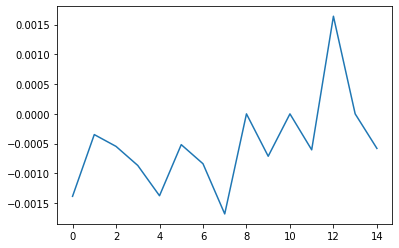

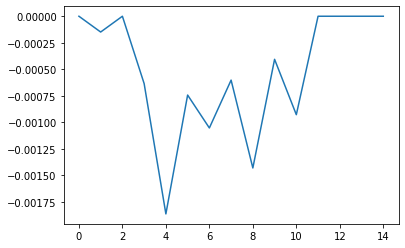

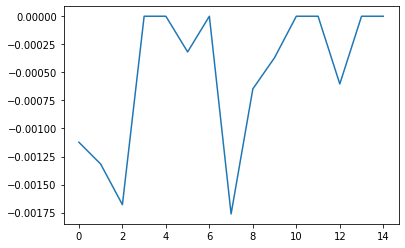

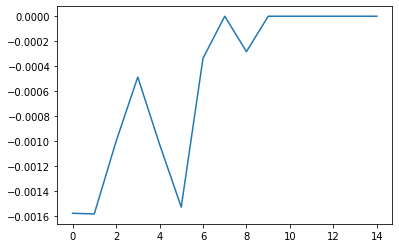

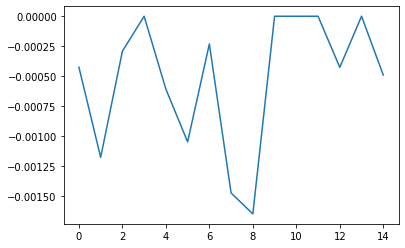

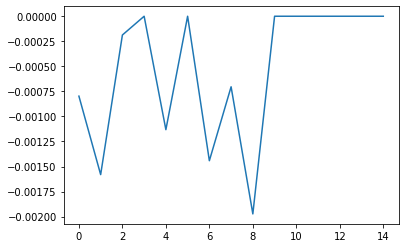

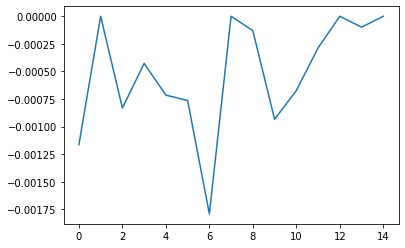

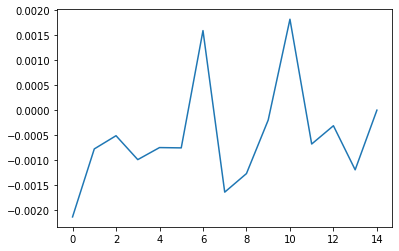

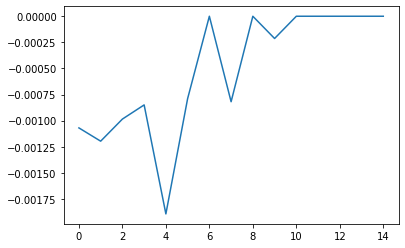

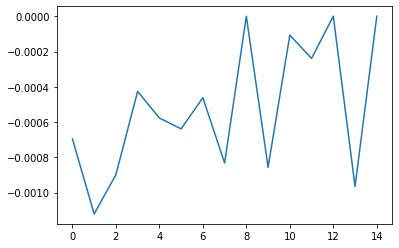

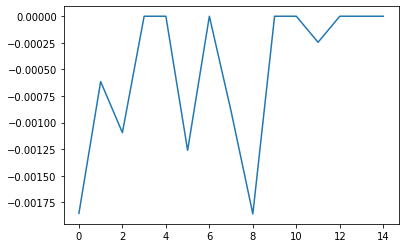

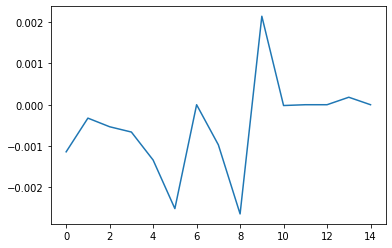

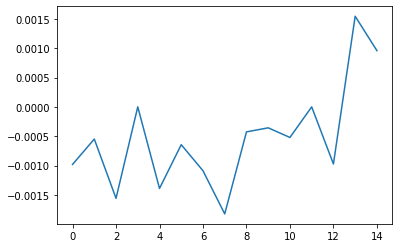

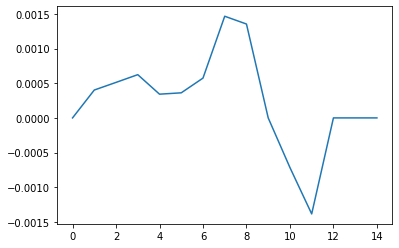

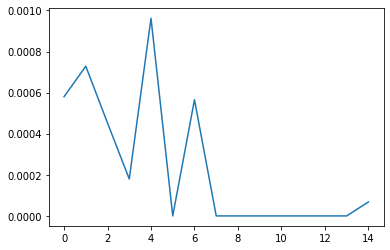

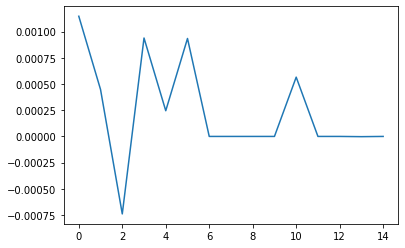

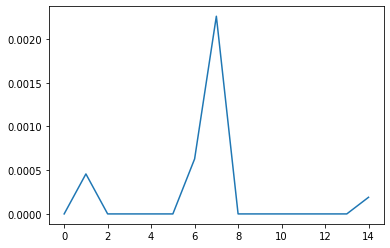

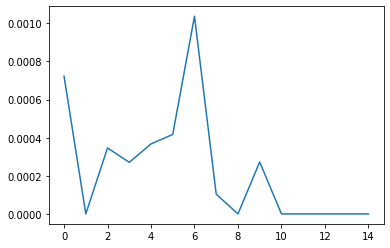

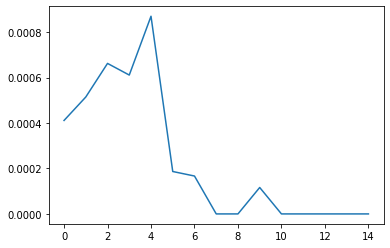

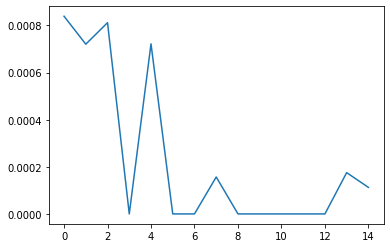

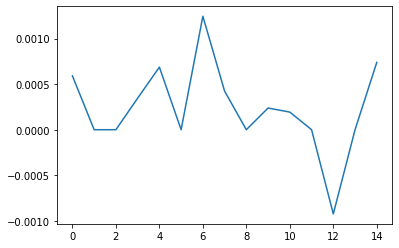

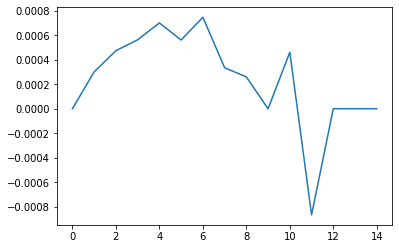

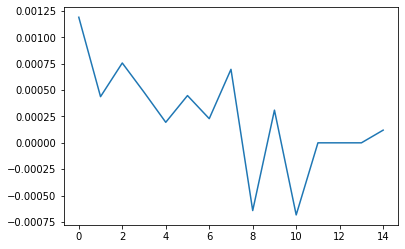

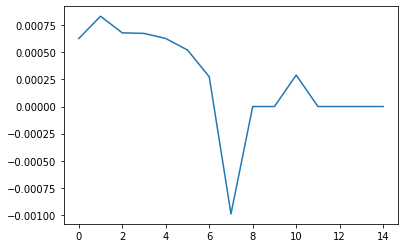

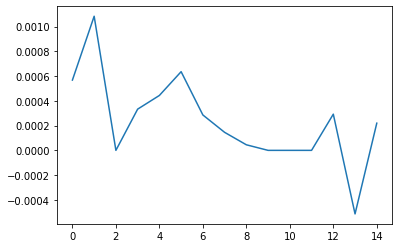

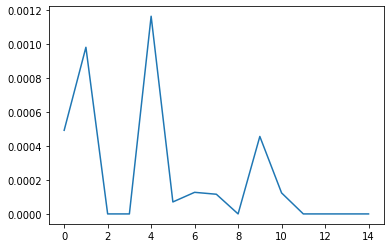

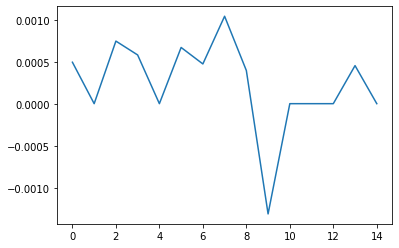

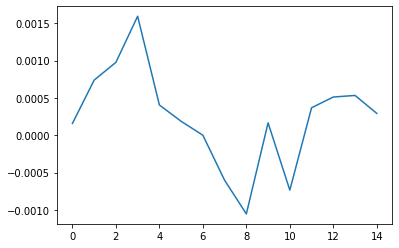

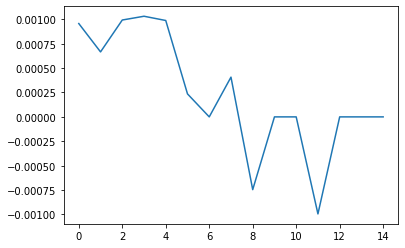

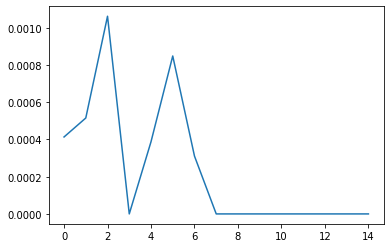

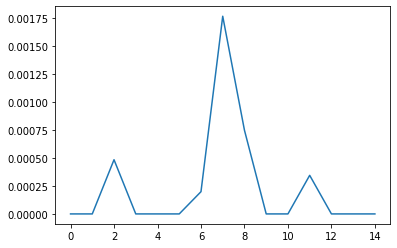

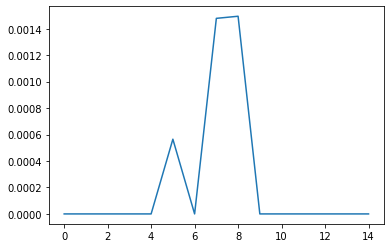

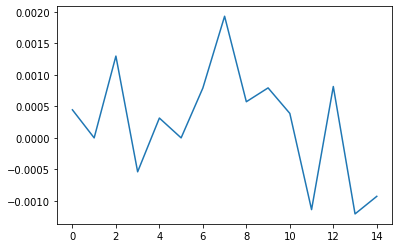

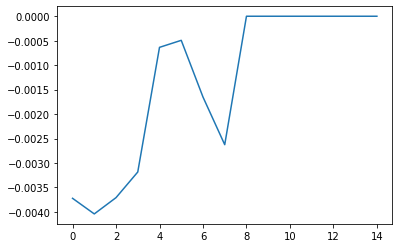

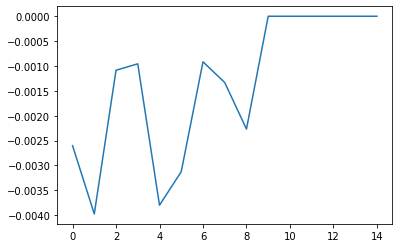

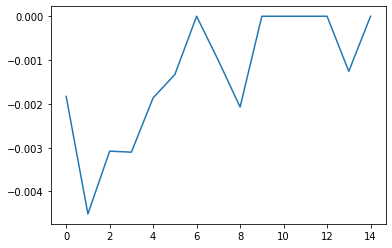

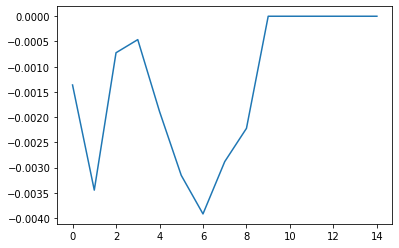

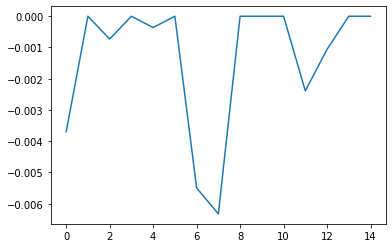

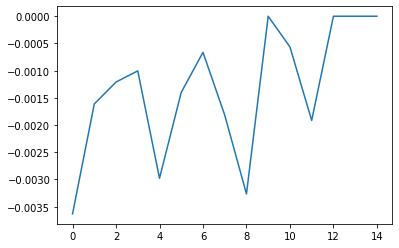

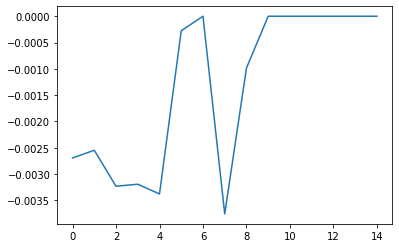

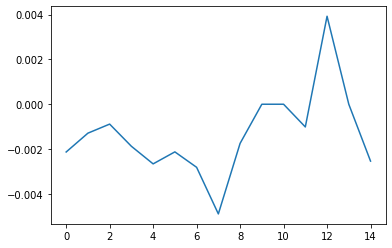

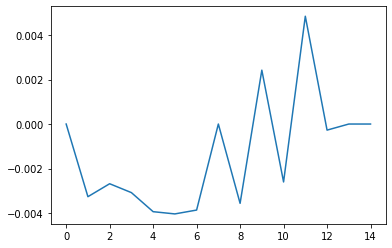

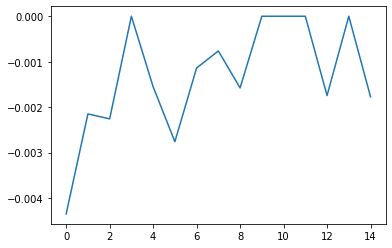

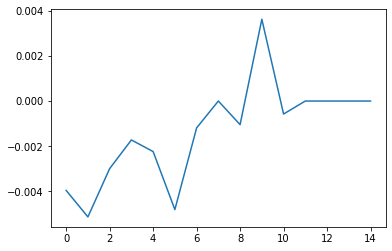

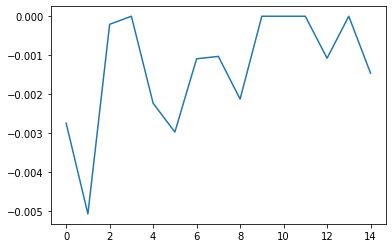

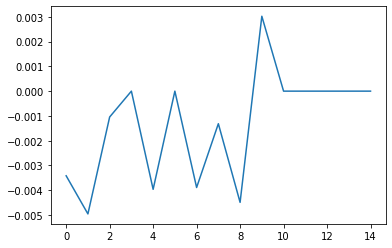

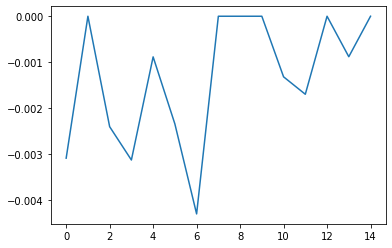

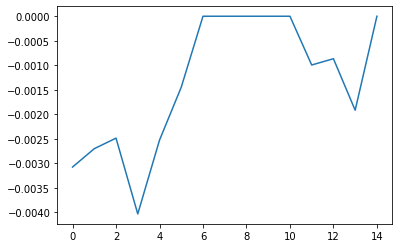

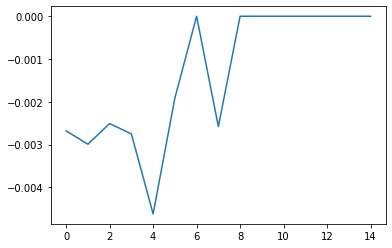

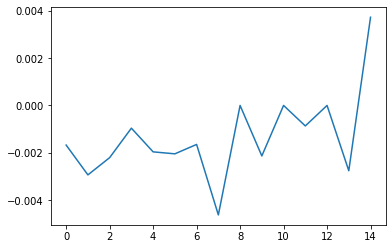

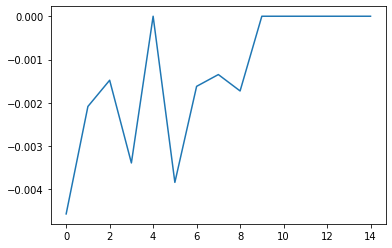

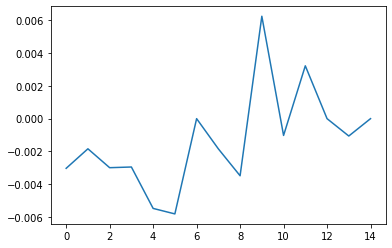

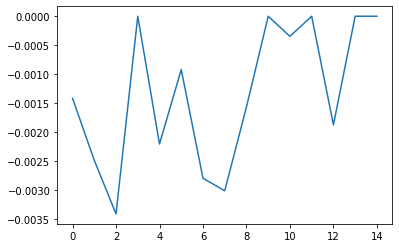

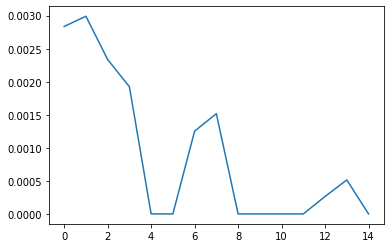

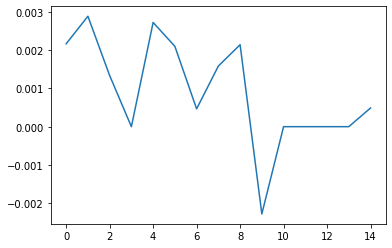

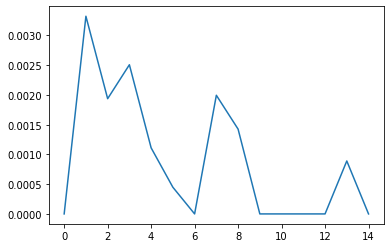

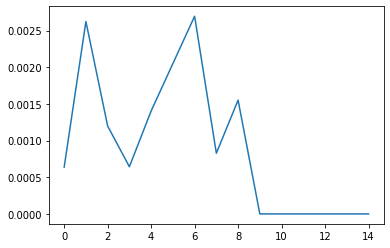

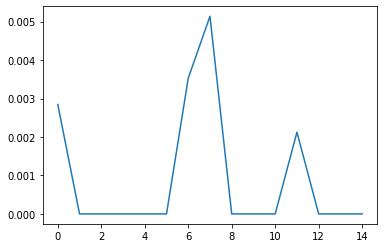

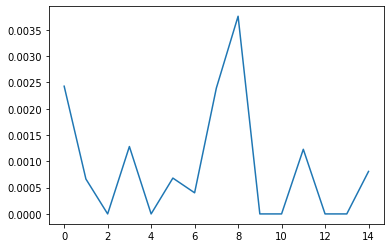

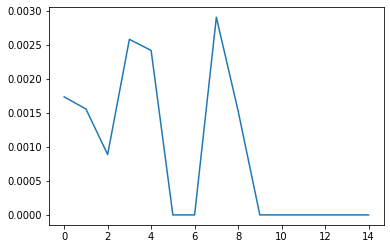

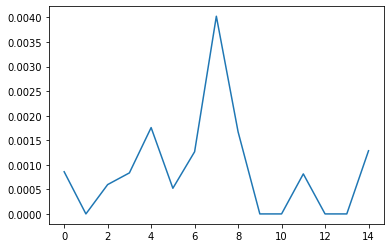

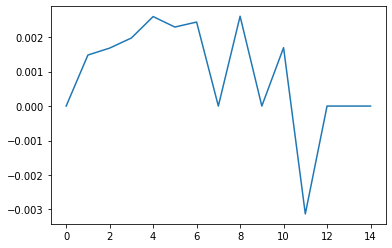

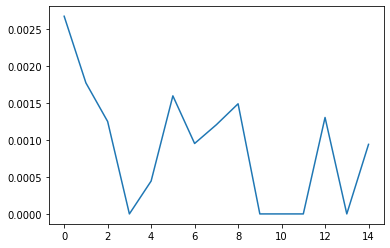

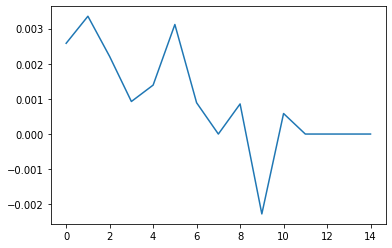

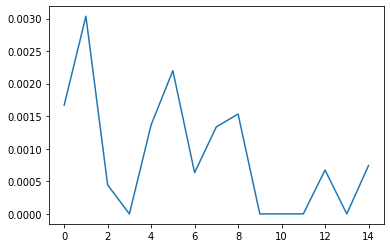

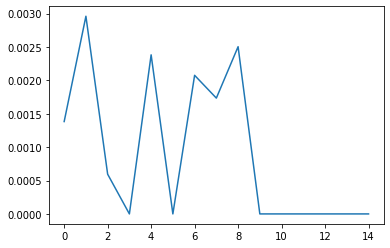

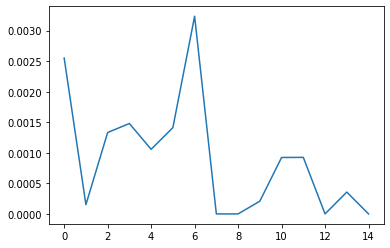

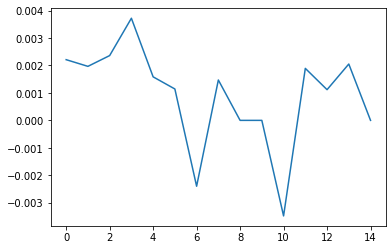

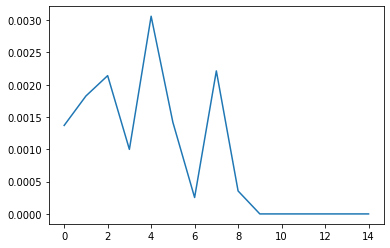

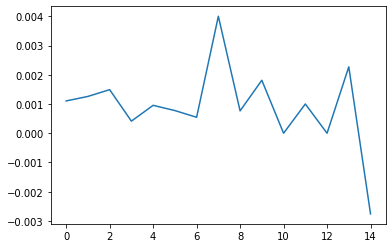

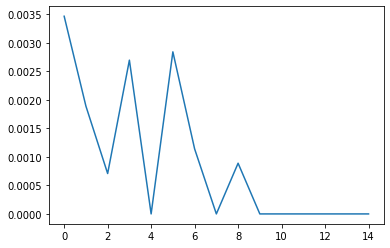

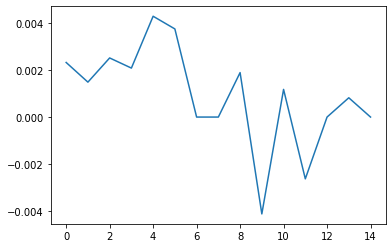

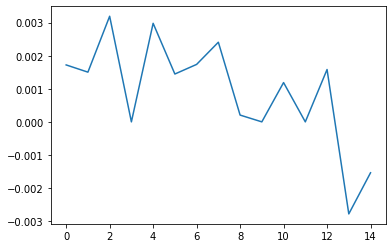

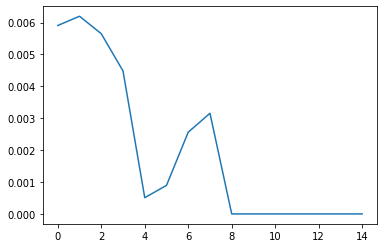

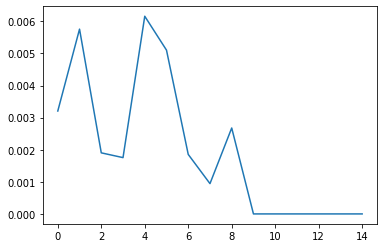

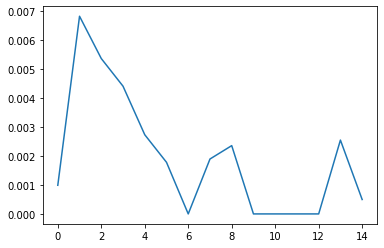

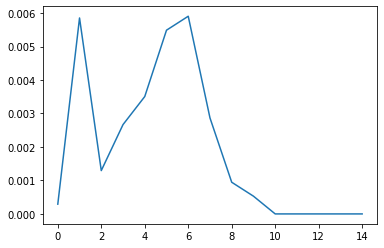

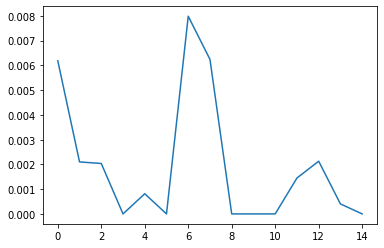

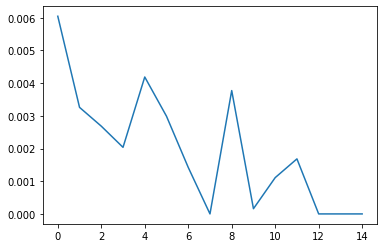

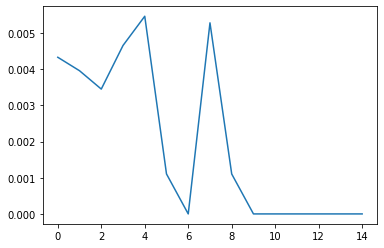

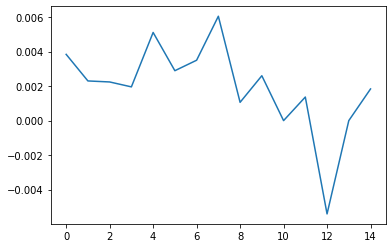

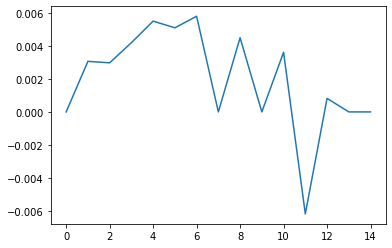

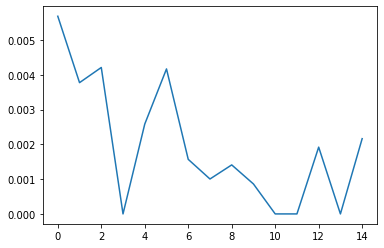

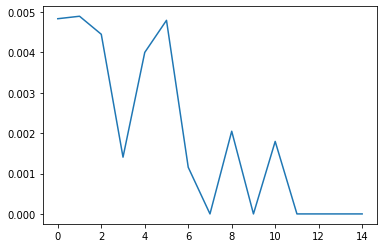

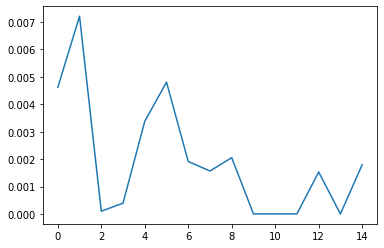

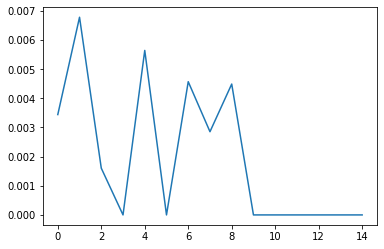

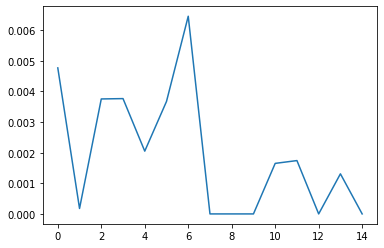

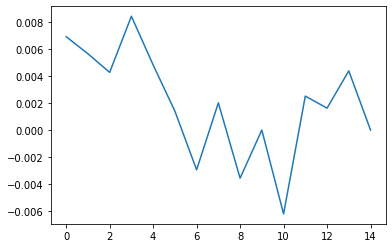

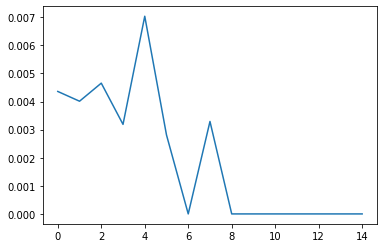

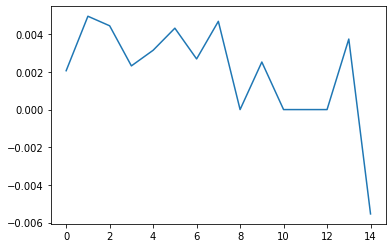

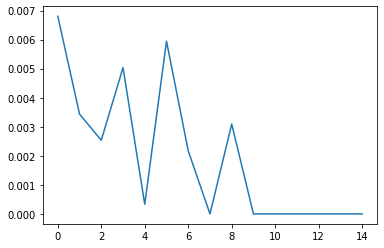

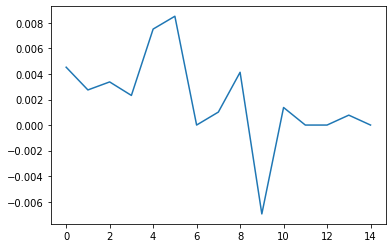

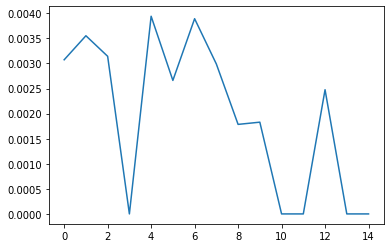

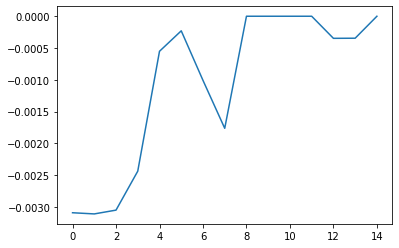

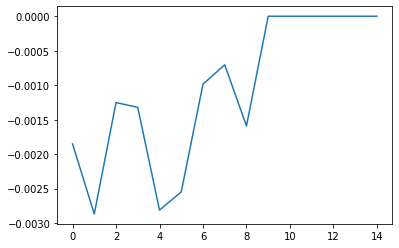

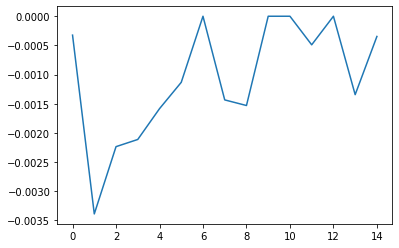

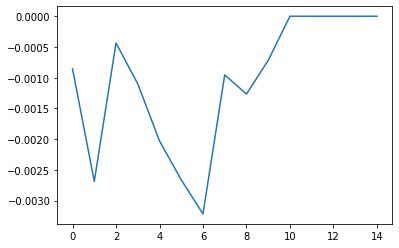

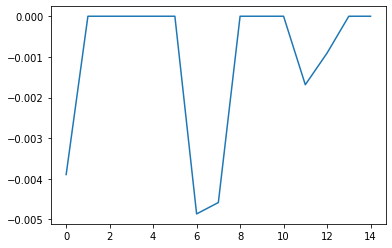

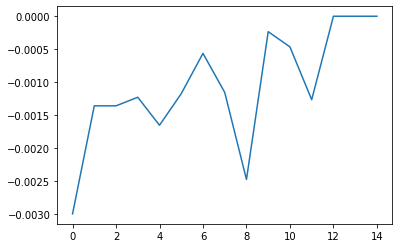

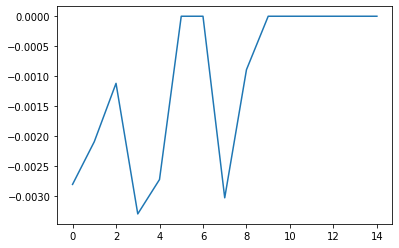

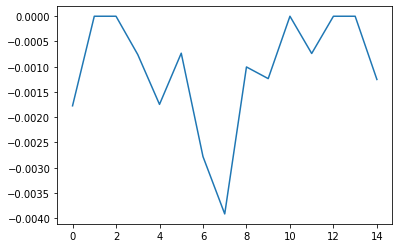

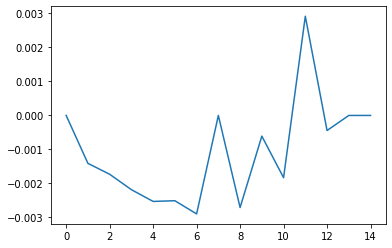

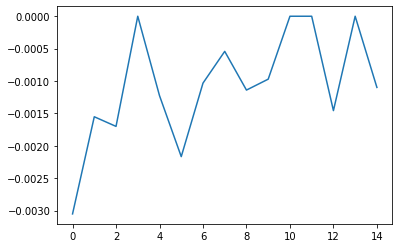

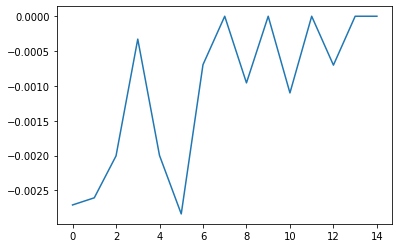

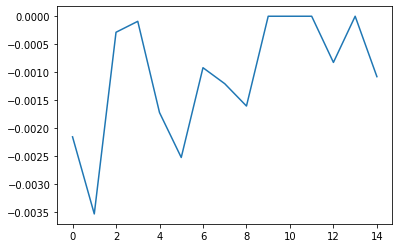

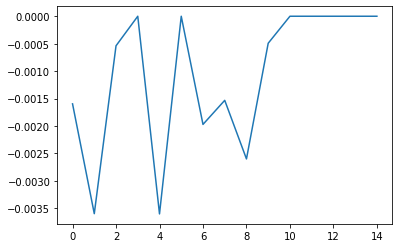

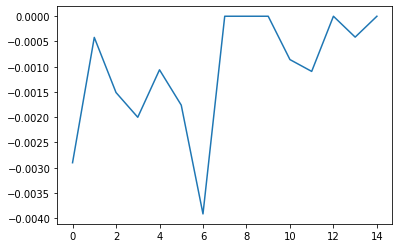

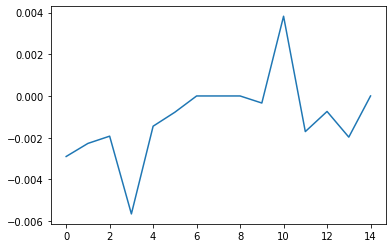

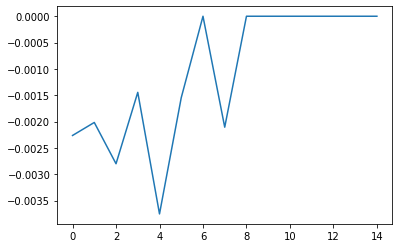

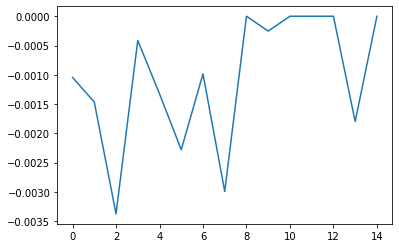

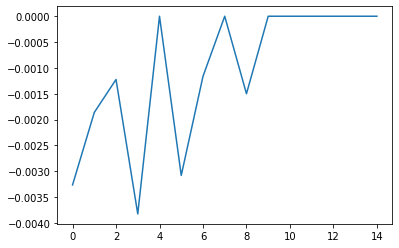

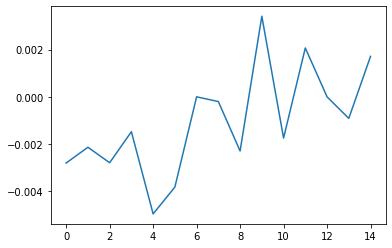

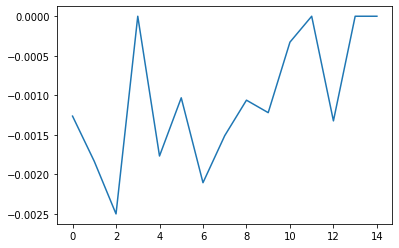

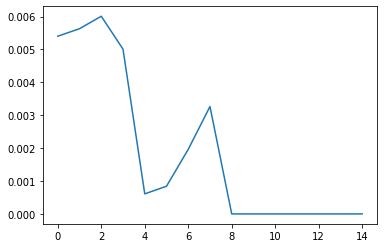

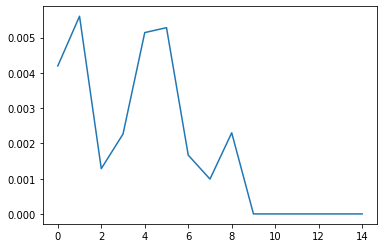

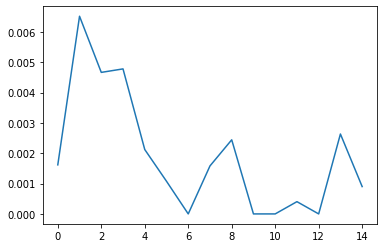

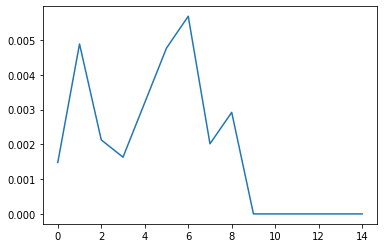

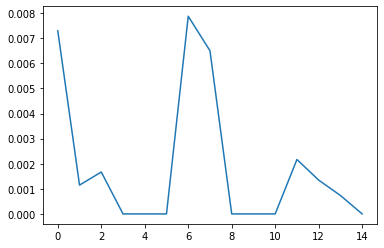

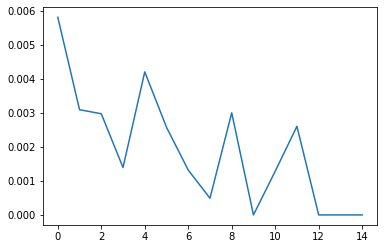

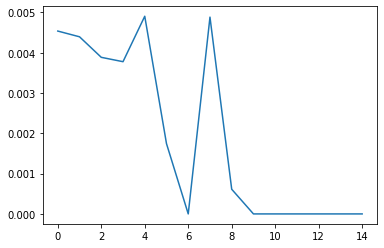

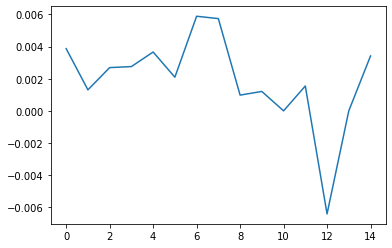

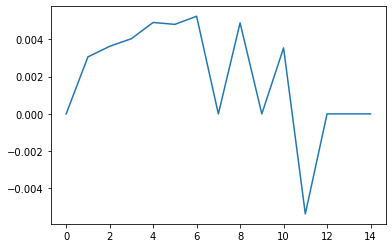

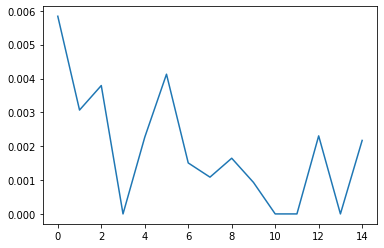

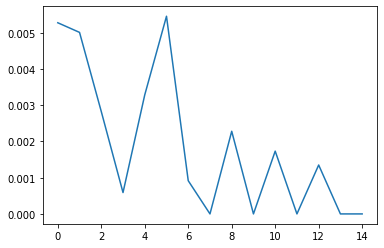

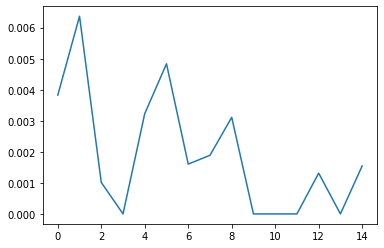

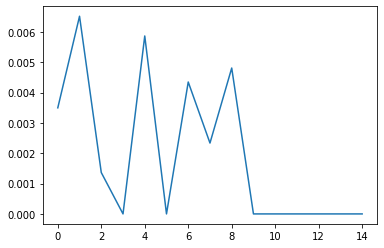

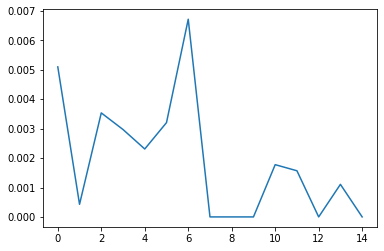

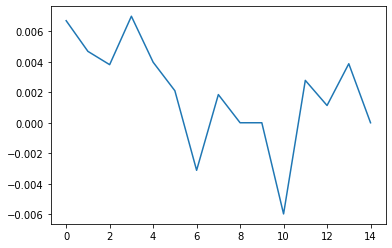

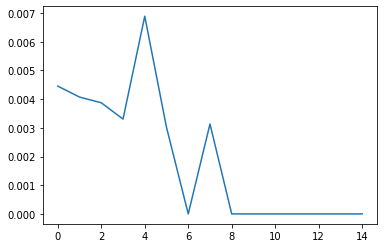

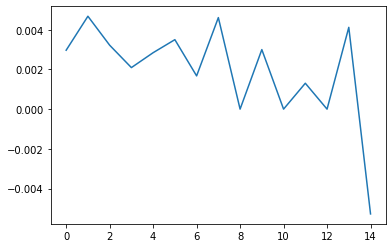

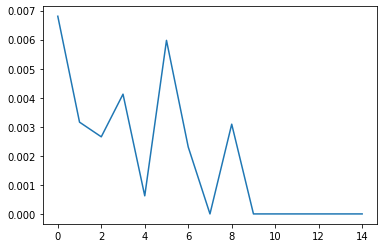

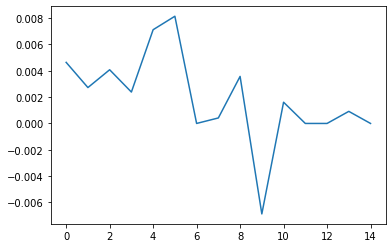

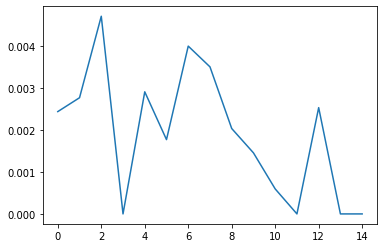

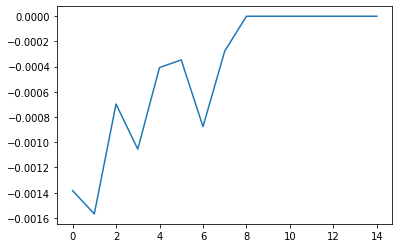

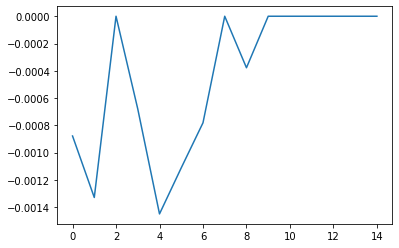

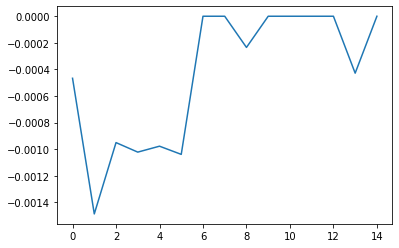

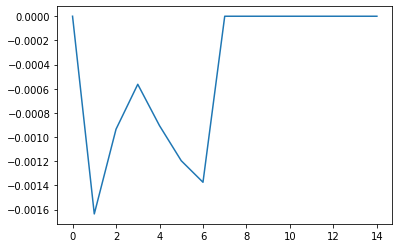

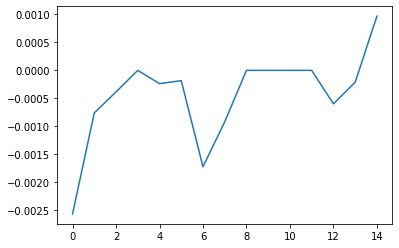

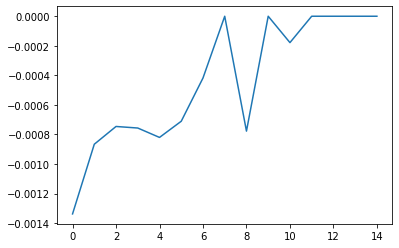

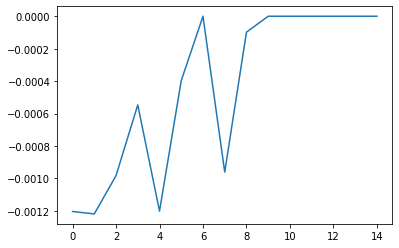

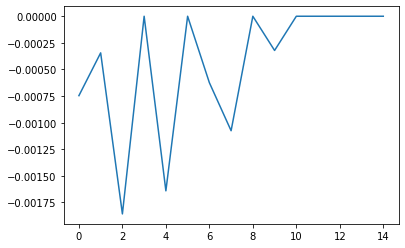

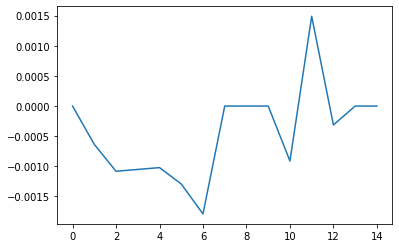

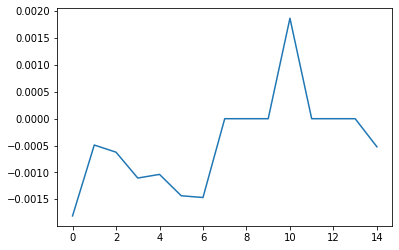

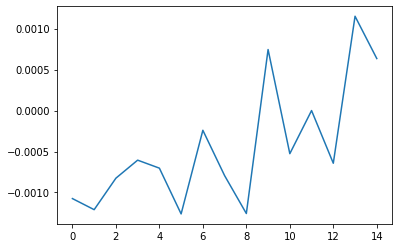

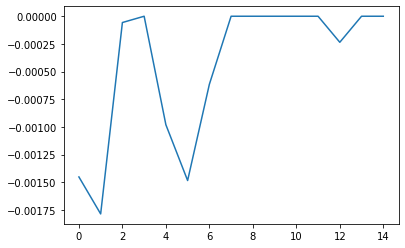

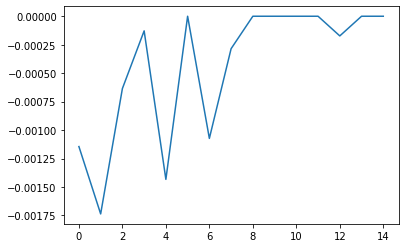

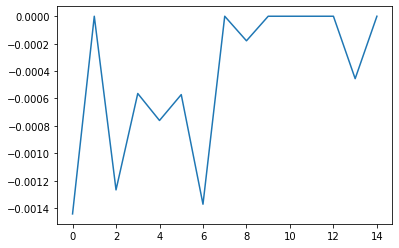

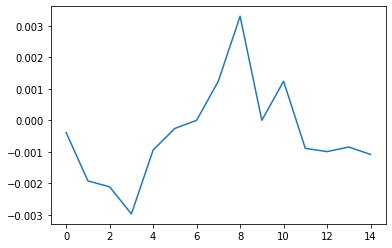

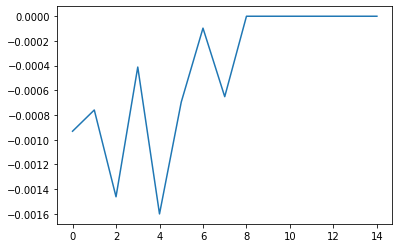

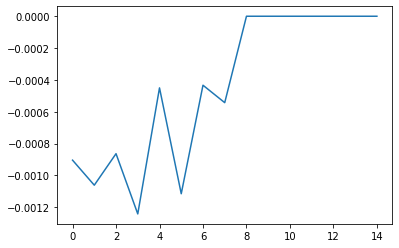

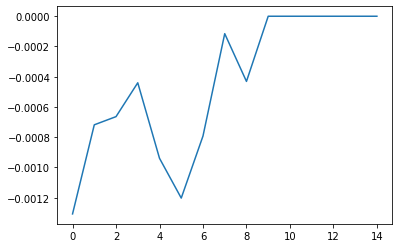

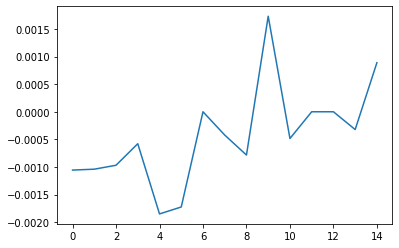

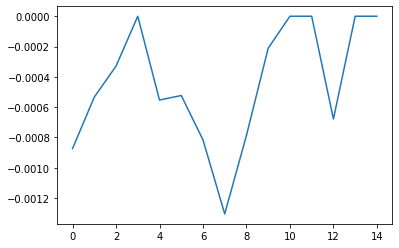

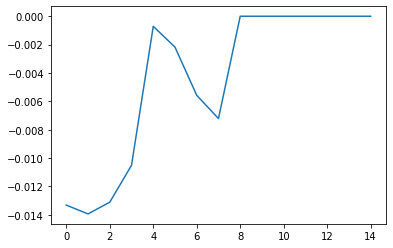

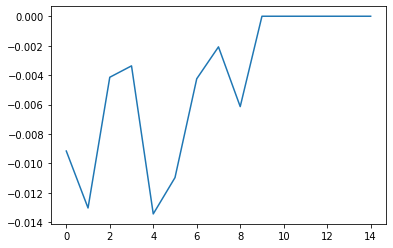

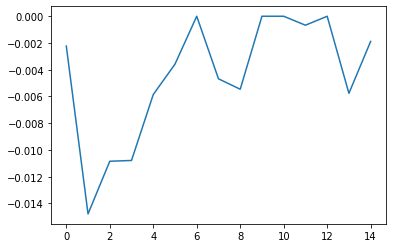

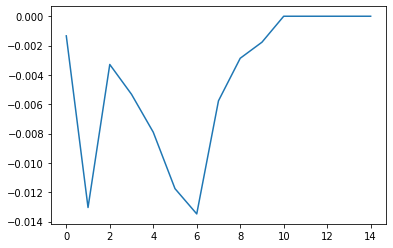

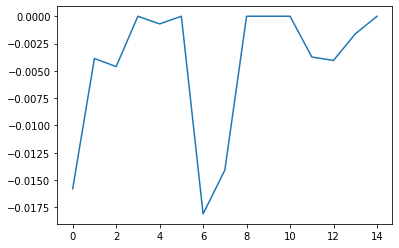

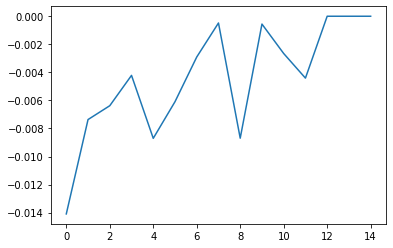

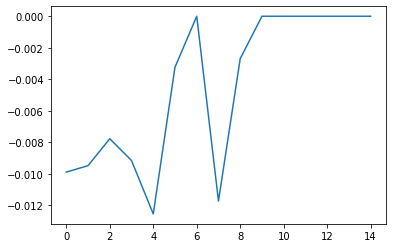

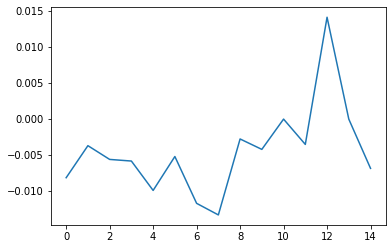

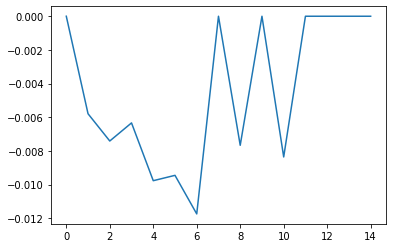

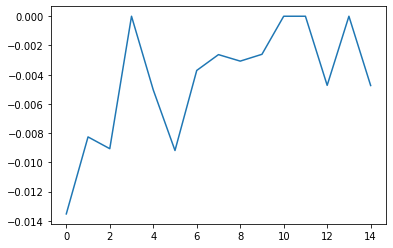

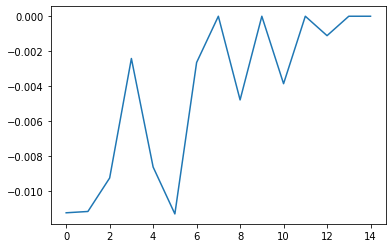

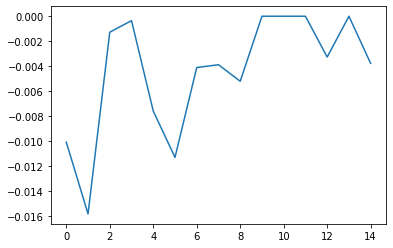

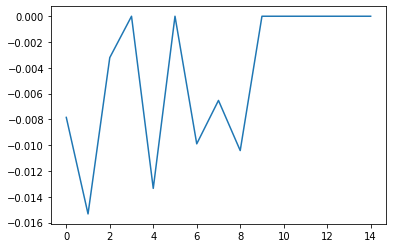

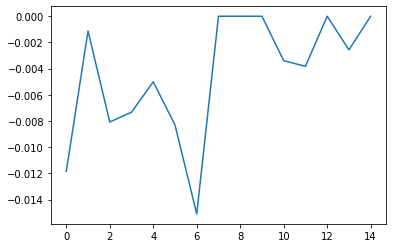

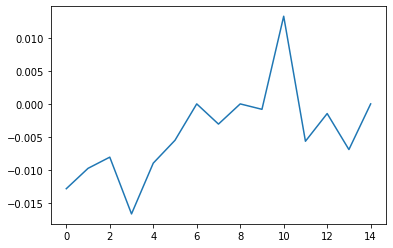

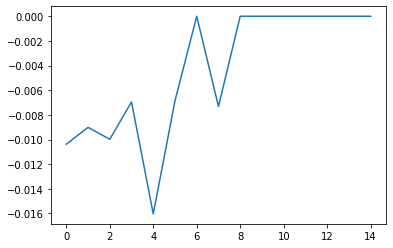

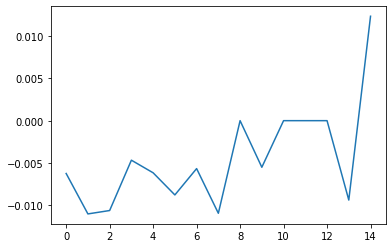

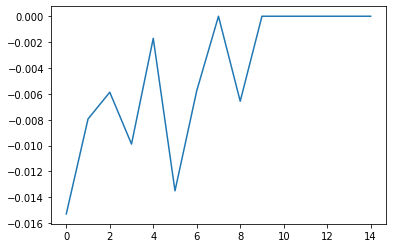

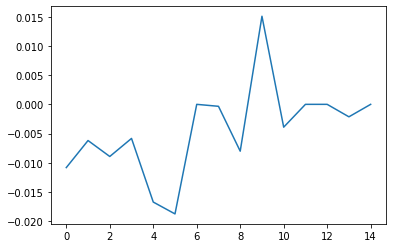

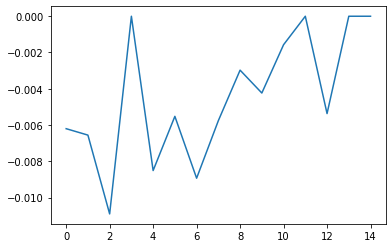

In [42]:
import matplotlib.pyplot as plt
number_of_labels=9
number_of_training_samples=20



for l in range (number_of_labels): # in this example we have 9 labels
    for t in range (number_of_training_samples): #we choose 20 training samples
        
        plt.plot(shap_values[l][t]) 
        #p2 = plt.plot(dates, psal, 'b-', label="Salinity (psu)")  
        #plt.legend(loc='upper center', numpoints=1, bbox_to_anchor=(0.5, -0.05),        ncol=2, fancybox=True, shadow=True)

        plt.savefig("shap_plots\\label"+ str(l) + "_training_"+ str(t)+".png")  
        plt.show() 
        plt.close()